In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# setting theme for the graphs
sns.set_theme(style='whitegrid', palette='pastel')

In [3]:
# create a variable for the file to be read
file = "/content/UCI Online Retail-RFM"

In [4]:
# reading the file
data = pd.read_csv(file)

In [5]:
# have alook at the 1st 5 rows fo the dataset
data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,2,0.00
1,12347,3,151,3598.21
2,12348,76,31,1797.24
3,12349,19,73,1757.55
4,12350,311,17,334.40


In [6]:
# check if there is any missing values
data.isnull().any()

CustomerID    False
Recency       False
Frequency     False
Monetary      False
dtype: bool

In [7]:
# understand the datatypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4258 entries, 0 to 4257
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4258 non-null   int64  
 1   Recency     4258 non-null   int64  
 2   Frequency   4258 non-null   int64  
 3   Monetary    4258 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 133.2 KB


In [8]:
# understand descriptive statistics
data.describe()

,CustomerID,Recency,Frequency,Monetary
count,4258.000000,4258.000000,4258.000000,4258.000000
mean,15293.656177,86.363316,92.024425,1880.916281
std,1720.269930,93.336569,228.508839,8027.881891
min,12346.000000,1.000000,1.000000,0.000000
25%,13811.250000,17.000000,18.000000,297.822500
50%,15288.500000,47.000000,42.000000,652.720000
75%,16774.750000,130.000000,100.000000,1603.767500
max,18287.000000,365.000000,7793.000000,279489.020000


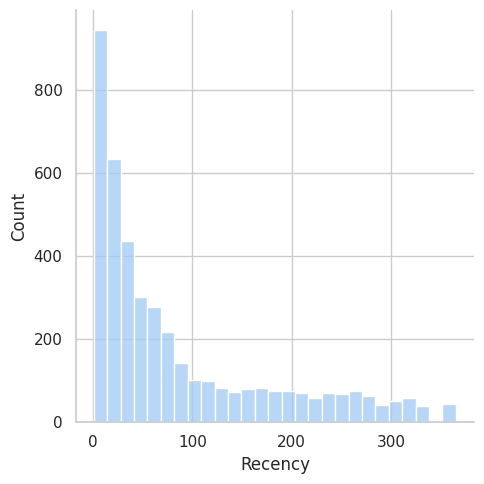

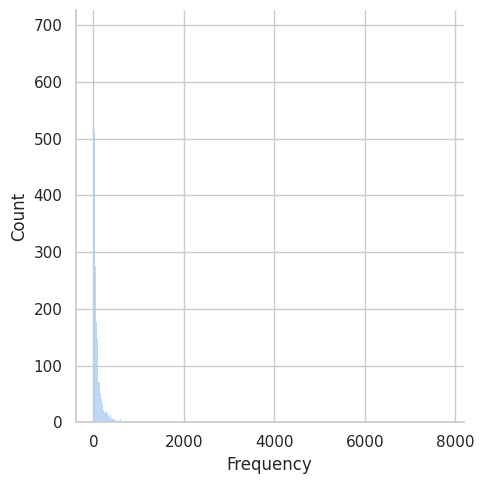

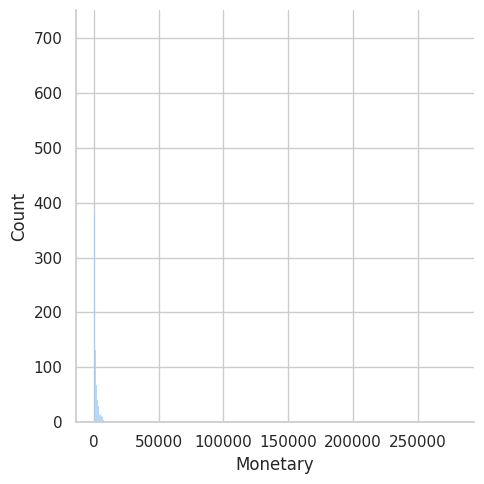

In [9]:
# plot graphs for visual inspection
plt.figsize=(8,6)
sns.displot(data['Recency'])
sns.displot(data['Frequency'])
sns.displot(data['Monetary'])
plt.show()

As noted in the graphs, the data of these 3 columns are right-skewed.  We need to apply transformation so that there are more normally distributed.

In [10]:
# make a copy for further processing
df = data.copy()

In [11]:
# make a copy for transformations
df_rfm = data.copy()

In [12]:
# drop the column CustomerID as it does not have relevancy in the clustering process
df_rfm.drop(columns=['CustomerID'], axis=1, inplace=True)
df_rfm.head()

,Recency,Frequency,Monetary
0,326,2,0.00
1,3,151,3598.21
2,76,31,1797.24
3,19,73,1757.55
4,311,17,334.40


In [13]:
# define a function for transformation of the skewed data
def standardize_features(df):
  skewed_features = ['Recency', 'Frequency','Monetary']
  for feature in skewed_features:
    df[feature] = np.log(df[feature])
  return df

In [14]:
# as noted in the descriptive statistis, column 'Monetary' has a min value of 0 which we cannot apply log transformation as it will return an infinite value.  Thus, we will add 1.
df_rfm.Monetary = df_rfm.Monetary + 1
df_rfm.head()

,Recency,Frequency,Monetary
0,326,2,1.00
1,3,151,3599.21
2,76,31,1798.24
3,19,73,1758.55
4,311,17,335.40


In [15]:
# execute the standardize_features function
standardize_features(df_rfm)

,Recency,Frequency,Monetary
0,5.786897,0.693147,0.000000
1,1.098612,5.017280,8.188470
2,4.330733,3.433987,7.494564
3,2.944439,4.290459,7.472245
4,5.739793,2.833213,5.815324
...,...,...,...
4253,5.627621,2.302585,5.201806
4254,5.198497,1.945910,4.404522
4255,2.079442,2.564949,5.179534
4256,1.386294,6.628041,7.647729


In [16]:
# relook the descriptive statistics of the standardize df
df_rfm.describe()

,Recency,Frequency,Monetary
count,4258.000000,4258.000000,4258.000000
mean,3.717342,3.698529,6.537570
std,1.392136,1.307109,1.296820
min,0.000000,0.000000,0.000000
25%,2.833213,2.890372,5.699850
50%,3.850148,3.737670,6.482679
75%,4.867534,4.605170,7.380734
max,5.899897,8.960981,12.540722


In [17]:
# define a function to normalize the values (one of the requirements for kmeans modeling)
from sklearn.preprocessing import MinMaxScaler

def scale_features(df):
  mms = MinMaxScaler()
  scaled_features = ['Recency', 'Frequency','Monetary']
  for feature in scaled_features:
    df[[feature]] = mms.fit_transform(df[[feature]])
  return df

In [18]:
# execute the function
scale_features(df_rfm)

,Recency,Frequency,Monetary
0,0.980847,0.077352,0.000000
1,0.186209,0.559903,0.652950
2,0.734035,0.383216,0.597618
3,0.499066,0.478793,0.595838
4,0.972863,0.316172,0.463715
...,...,...,...
4253,0.953851,0.256957,0.414793
4254,0.881117,0.217154,0.351218
4255,0.352454,0.286235,0.413017
4256,0.234969,0.739656,0.609832


In [19]:
# have a look at the descriptive statistics.  We should be able to see changes to the mean, standard deviation, ect.
df_rfm.describe()

,Recency,Frequency,Monetary
count,4258.000000,4258.000000,4258.000000
mean,0.630069,0.412737,0.521307
std,0.235959,0.145867,0.103409
min,0.000000,0.000000,0.000000
25%,0.480214,0.322551,0.454507
50%,0.652579,0.417105,0.516930
75%,0.825020,0.513914,0.588541
max,1.000000,1.000000,1.000000


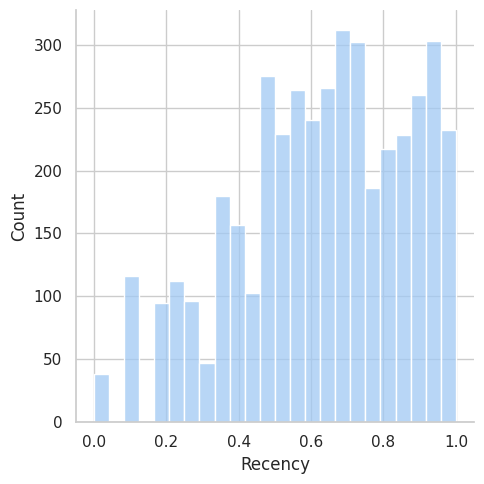

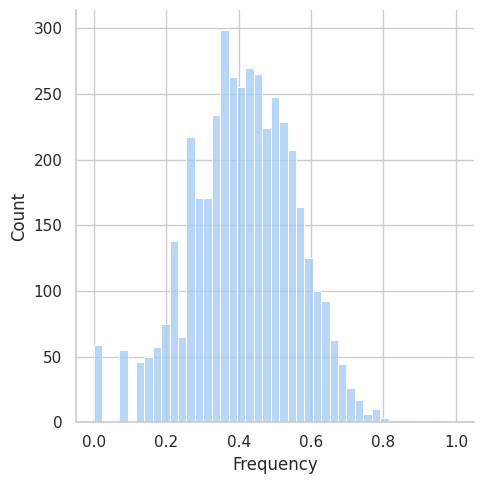

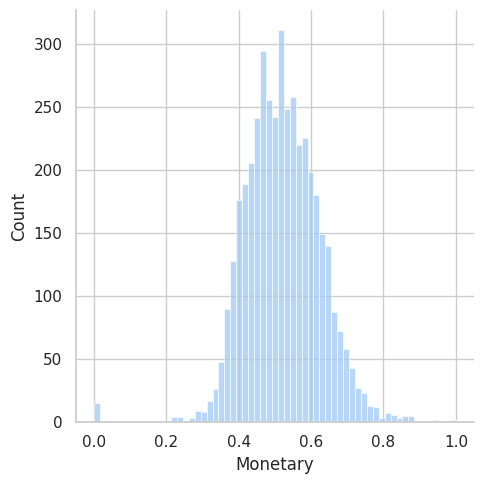

In [20]:
# visualizing the changes
plt.figsize=(8,6)
sns.displot(df_rfm['Recency'])
sns.displot(df_rfm['Frequency'])
sns.displot(df_rfm['Monetary'])
plt.show()

In [21]:
# importing KMeans
from sklearn.cluster import KMeans

In [22]:
# initializing the model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state = 168)
kmeans.fit(df_rfm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=168)

In [23]:
# create a variable for the kmeans labels
cluster_labels = kmeans.labels_

In [24]:
# create a new df to incorporate the cluster labels
df_rfm_k2 = df.assign(Cluster=cluster_labels)

In [25]:
# randomly look at 5 samples
df_rfm_k2.sample(5)

,CustomerID,Recency,Frequency,Monetary,Cluster
2858,16315,331,14,226.37,1
3700,17502,10,28,689.10,0
2131,15291,26,107,4267.71,0
2850,16302,108,12,212.82,1
3242,16841,37,117,1774.62,0


In [26]:
# group the data by clusters for assessment
df_rfm_k2.groupby(['Cluster']).agg({'Recency':'mean', 'Frequency':'mean','Monetary':['mean','count']})

Recency   Frequency     Monetary      
               mean        mean         mean count
Cluster                                           
0         16.221488  166.915152  3523.661609  1815
1        138.474417   36.385182   660.456694  2443

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

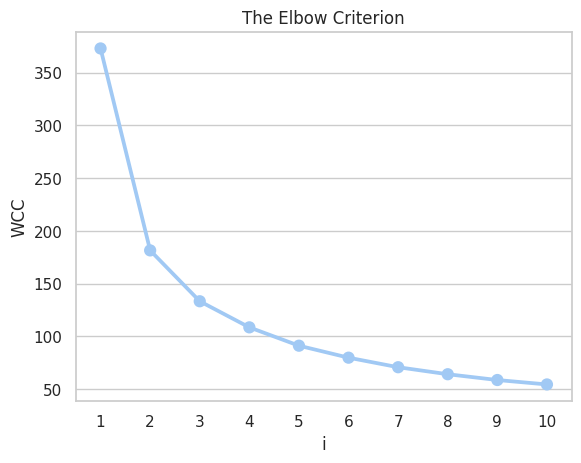

In [27]:
# using the 'elbow' method to determine the appropriate cluster size
wcc = {}

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=168)
  kmeans.fit(df_rfm)
  wcc[i] = kmeans.inertia_

plt.title("The Elbow Criterion")
plt.xlabel('i')
plt.ylabel('WCC')
sns.pointplot(x=list(wcc.keys()), y=list(wcc.values()))
plt.show()

Based on the diagram above, the inflexion points could be 2, 3 or 4.  Let's undestand the clusters in the size is 3 or 4.  Ultimately, this diagram provides a reference point but the appropriate number of clusters will depend on business needs.

In [28]:
# experimenting with 3 clusters
kmeans = KMeans(n_clusters=3, random_state = 168)
kmeans.fit(df_rfm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=168)

In [29]:
# create a variable for the cluster labels
cluster_labels3 = kmeans.labels_

In [30]:
# create a new dataframe for analysis of clusters=3
df_rfm_k3 = df.assign(Cluster=cluster_labels3)

In [31]:
# analyze the clusters in terms of Recency, Frequency and Monetary
df_rfm_k3.groupby(['Cluster']).agg({'Recency':'mean', 'Frequency':'mean','Monetary':['mean','count']}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         187.0      24.0    465.0  1515
1           7.0     225.0   5173.0   949
2          43.0      79.0   1336.0  1794

Based on 3 clusters, Cluster 1 would be the premium while cluster 0 will be the laggards.

In [32]:
# experimenting with 4 clusters
kmeans = KMeans(n_clusters=4, random_state = 168)
kmeans.fit(df_rfm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=168)

In [33]:
# create a variable for the cluster labels
cluster_labels4 = kmeans.labels_

In [34]:
# create a new dataframe for analyzing clusters=4
df_rfm_k4 = df.assign(Cluster=cluster_labels4)

In [35]:
# analyze the clusters in terms of Recency, Frequency and Monetary
df_rfm_k4.groupby(['Cluster']).agg({'Recency':'mean', 'Frequency':'mean','Monetary':['mean','count']}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         199.0      24.0    449.0  1363
1          33.0      22.0    413.0   823
2           6.0     233.0   5347.0   844
3          52.0     119.0   2072.0  1228

Based on 4 clusters, Cluster 2 will be the premium customers as they have the highest mean monetary value and they purchased frequently resulting in low Recency and high Frequency.  We can work on Cluster 0 as well as 1.